# Modeling Exercises

## Imports

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

from pydataset import data

import wrangle_mall

## Get Data

In [2]:
df = data('iris')
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


## Prepare data

### Let's fix the column names by making everything lower case and replacing the dot separator with and underscore

In [3]:
new_col_names = []

for col in df.columns:
    new_col_names.append(col.lower().replace('.', '_'))
    
df.columns = new_col_names

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [4]:
X = df[['petal_length', 'petal_width']]
X.head()

,petal_length,petal_width
1,1.4,0.2
2,1.4,0.2
3,1.3,0.2
4,1.5,0.2
5,1.4,0.2


## Modeling

### Create and Fit cluster model

In [5]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

clusters = kmeans.predict(X)
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

### Add cluster to our original data

In [6]:
df['cluster'] = clusters
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
1,5.1,3.5,1.4,0.2,setosa,1
2,4.9,3.0,1.4,0.2,setosa,1
3,4.7,3.2,1.3,0.2,setosa,1
4,4.6,3.1,1.5,0.2,setosa,1
5,5.0,3.6,1.4,0.2,setosa,1


### Visualize Clusters

[Text(0.5, 1.0, 'K-Means Clusters')]

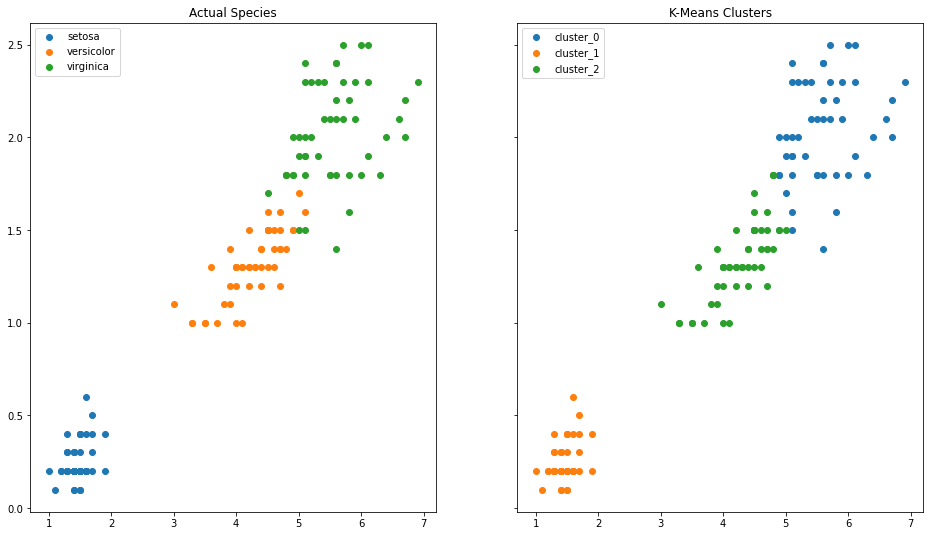

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(16, 9), sharex=True, sharey=True)

for species, subset in df.groupby('species'):
    axs[0].scatter(subset.petal_length, subset.petal_width, label=species)
    
axs[0].legend()
axs[0].set(title='Actual Species')
    
for cluster_n in df.cluster.sort_values().unique():
    axs[1].scatter(df[df.cluster == cluster_n].petal_length, df[df.cluster == cluster_n].petal_width, label=f'cluster_{cluster_n}')

axs[1].legend()
axs[1].set(title="K-Means Clusters")

### Use elbow method to determine cluster number

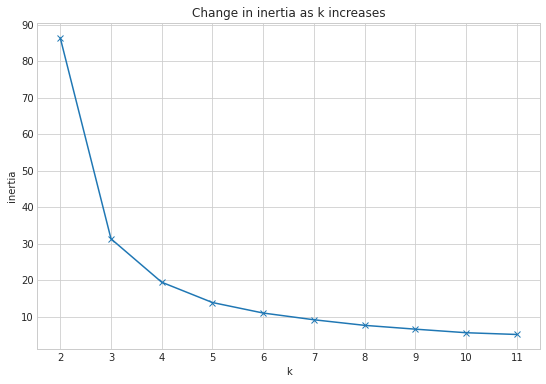

In [8]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

#### This graph seems to show a drop off in inertia around **k=4** so let's look at around there to see what seems best

### Visuals cluster around k=4

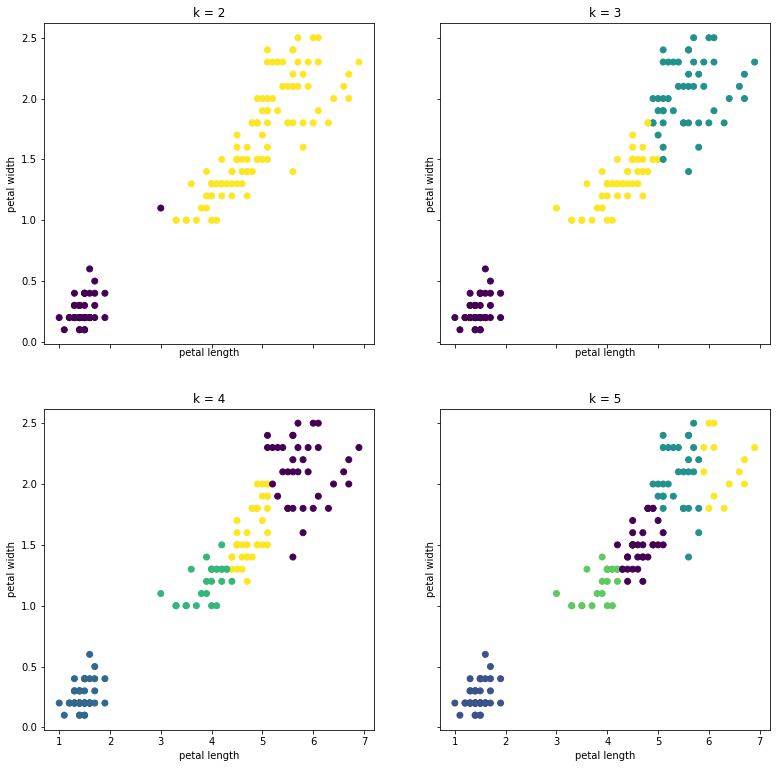

In [9]:
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X).predict(X)
    ax.scatter(X.petal_length, X.petal_width, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='petal length', ylabel='petal width')

### Clustering on 3 features

In [10]:
X = df[['petal_length', 'petal_width', 'sepal_length']]
X.head()

,petal_length,petal_width,sepal_length
1,1.4,0.2,5.1
2,1.4,0.2,4.9
3,1.3,0.2,4.7
4,1.5,0.2,4.6
5,1.4,0.2,5.0


In [11]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

clusters = kmeans.predict(X)
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [12]:
df['three_feature_cluster'] = clusters
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster,three_feature_cluster
1,5.1,3.5,1.4,0.2,setosa,1,0
2,4.9,3.0,1.4,0.2,setosa,1,0
3,4.7,3.2,1.3,0.2,setosa,1,0
4,4.6,3.1,1.5,0.2,setosa,1,0
5,5.0,3.6,1.4,0.2,setosa,1,0


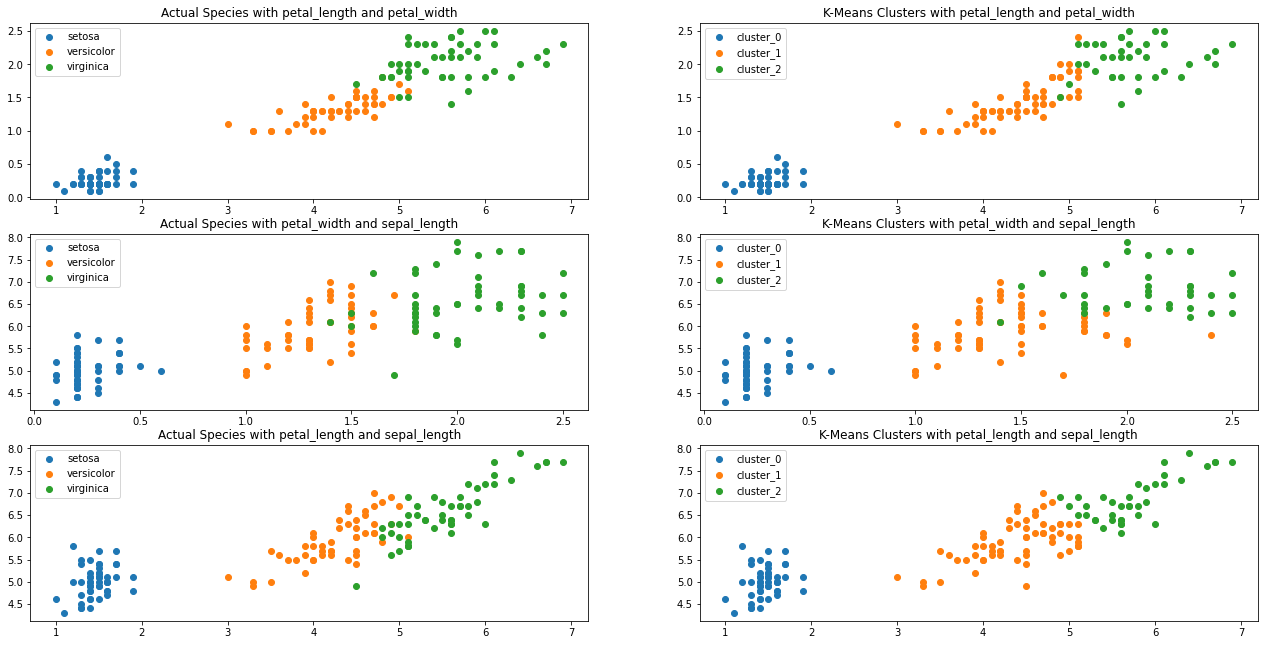

In [13]:
fig, axs = plt.subplots(3, 2, figsize=(22, 11))

for species, subset in df.groupby('species'):
    axs[0,0].scatter(subset.petal_length, subset.petal_width, label=species)
    
axs[0,0].legend()
axs[0,0].set(title='Actual Species with petal_length and petal_width')
    
for cluster_n in df.three_feature_cluster.sort_values().unique():
    axs[0,1].scatter(df[df.three_feature_cluster == cluster_n].petal_length, df[df.three_feature_cluster == cluster_n].petal_width, label=f'cluster_{cluster_n}')

axs[0,1].legend()
axs[0,1].set(title="K-Means Clusters with petal_length and petal_width")

for species, subset in df.groupby('species'):
    axs[1,0].scatter(subset.petal_width, subset.sepal_length, label=species)
    
axs[1,0].legend()
axs[1,0].set(title='Actual Species with petal_width and sepal_length')

for cluster_n in df.three_feature_cluster.sort_values().unique():
    axs[1,1].scatter(df[df.three_feature_cluster == cluster_n].petal_width, df[df.three_feature_cluster == cluster_n].sepal_length, label=f'cluster_{cluster_n}')

axs[1,1].legend()
axs[1,1].set(title="K-Means Clusters with petal_width and sepal_length")

for species, subset in df.groupby('species'):
    axs[2,0].scatter(subset.petal_length, subset.sepal_length, label=species)
    
axs[2,0].legend()
axs[2,0].set(title='Actual Species with petal_length and sepal_length')

for cluster_n in df.three_feature_cluster.sort_values().unique():
    axs[2,1].scatter(df[df.three_feature_cluster == cluster_n].petal_length, df[df.three_feature_cluster == cluster_n].sepal_length, label=f'cluster_{cluster_n}')

axs[2,1].legend()
axs[2,1].set(title="K-Means Clusters with petal_length and sepal_length")

plt.show()

## Clustering the Mall Dataset

### Bring in our modeling data

In [14]:
train, val, test = wrangle_mall.get_modeling_data()
train.head()

Before dropping nulls, 200 rows, 4 cols
After dropping nulls, 200 rows, 4 cols

Before removing outliers, 200 rows, 4 cols
After dropping outliers, 198 rows, 4 cols

Train: 134 rows, 4 cols
Validate: 34 rows, 4 cols
Test: 30 rows, 4 cols


,age,annual_income,spending_score,is_female
customer_id,,,,
20,35,23,98,True
105,49,62,56,False
182,32,97,86,True
197,45,126,28,True
79,23,54,52,True


### Let's take a quick look at our data

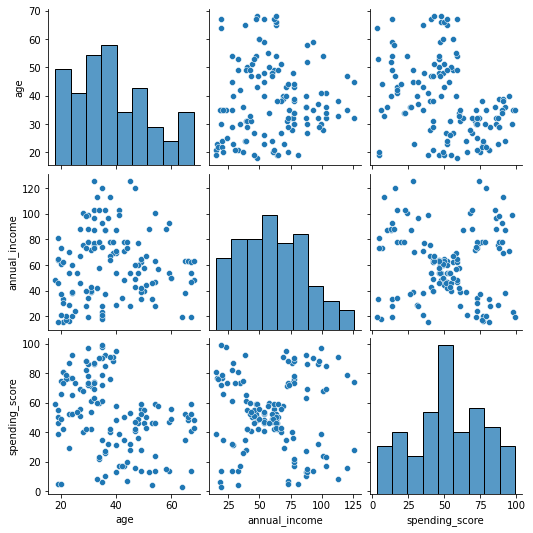

In [15]:
sns.pairplot(train.drop(columns='is_female'))

### I see a really nice X shape in the combonation of spending score and annual_income, so let's start with clustering on those features

In [16]:
X = train[['spending_score', 'annual_income']]
X.head()

,spending_score,annual_income
customer_id,,
20,98,23
105,56,62
182,86,97
197,28,126
79,52,54


### Create our clusters

In [17]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

clusters = kmeans.predict(X)
clusters

array([0, 2, 4, 3, 2, 2, 4, 4, 0, 4, 3, 3, 2, 3, 2, 4, 1, 0, 2, 2, 2, 2,
       3, 2, 0, 3, 3, 4, 3, 4, 4, 2, 2, 2, 4, 3, 1, 1, 4, 0, 2, 0, 4, 3,
       0, 2, 1, 2, 2, 2, 2, 3, 4, 1, 0, 0, 4, 4, 4, 2, 2, 1, 1, 1, 1, 2,
       0, 1, 2, 2, 0, 2, 4, 2, 2, 4, 4, 4, 2, 1, 4, 2, 3, 2, 2, 0, 4, 2,
       3, 4, 2, 1, 2, 2, 2, 2, 2, 2, 2, 0, 0, 3, 0, 1, 2, 4, 2, 2, 3, 0,
       4, 3, 0, 2, 2, 3, 1, 3, 2, 2, 4, 4, 2, 0, 3, 0, 3, 4, 2, 2, 3, 2,
       2, 3], dtype=int32)

### Add our clusters onto the training set

In [18]:
train['cluster'] = clusters
train.head()

,age,annual_income,spending_score,is_female,cluster
customer_id,,,,,
20,35,23,98,True,0
105,49,62,56,False,2
182,32,97,86,True,4
197,45,126,28,True,3
79,23,54,52,True,2


### Visualize our clusters

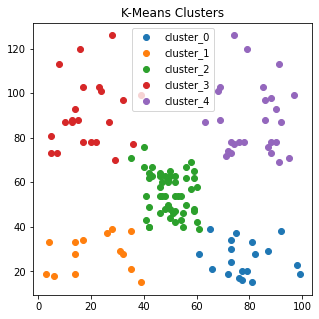

In [19]:
plt.figure(figsize=(5, 5))

for cluster_n in train.cluster.sort_values().unique():
    plt.scatter(train[train.cluster == cluster_n].spending_score, train[train.cluster == cluster_n].annual_income, label=f'cluster_{cluster_n}')

plt.legend()
plt.title("K-Means Clusters")
plt.show()

### Use the elbow method to determine if we have the appropriate number of clusters

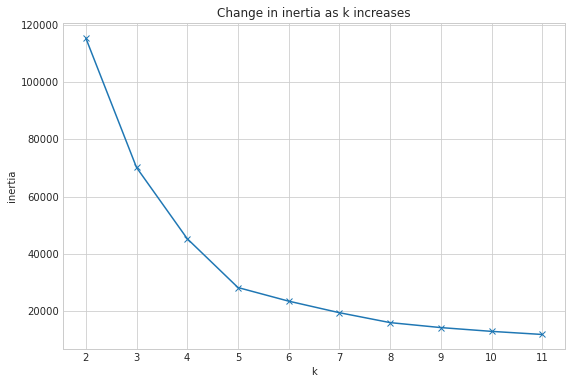

In [20]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

#### This seem to show the elbow around five so lets check around there

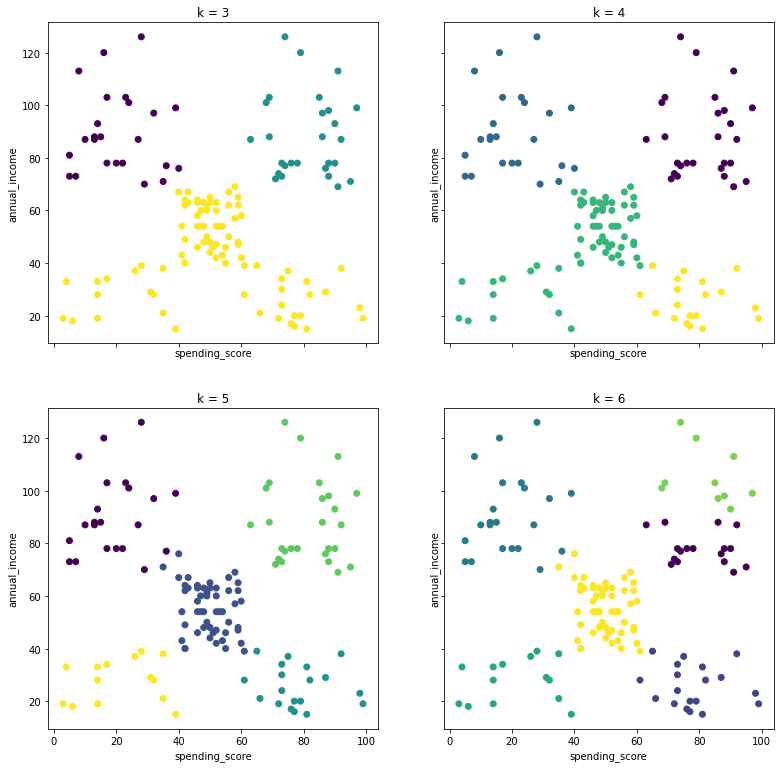

In [21]:
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(3, 7)):
    clusters = KMeans(k).fit(X).predict(X)
    ax.scatter(X.spending_score, X.annual_income, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='spending_score', ylabel='annual_income')

#### It looks like 5 clusters is good for capturing distinct groups in our data

## Clustering the Scaled Mall Dataset (Does scaling make a difference?)

In [22]:
scaler, train_scaled, val_scaled, test_scaled = wrangle_mall.get_modeling_data(scale_data=True)
train_scaled.head()

Before dropping nulls, 200 rows, 4 cols
After dropping nulls, 200 rows, 4 cols

Before removing outliers, 200 rows, 4 cols
After dropping outliers, 198 rows, 4 cols

Train: 134 rows, 4 cols
Validate: 34 rows, 4 cols
Test: 30 rows, 4 cols


,age,annual_income,spending_score,is_female
customer_id,,,,
20,0.34,0.072072,0.989583,True
105,0.62,0.423423,0.552083,False
182,0.28,0.738739,0.864583,True
197,0.54,1.000000,0.260417,True
79,0.10,0.351351,0.510417,True


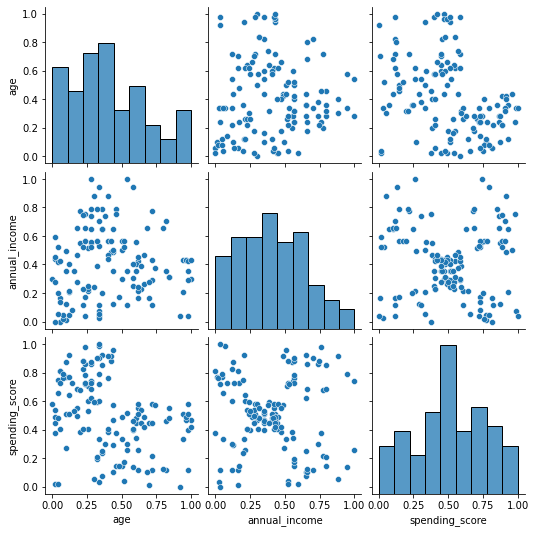

In [23]:
sns.pairplot(train_scaled.drop(columns='is_female'))

In [24]:
X = train_scaled[['spending_score', 'annual_income']]
X.head()

,spending_score,annual_income
customer_id,,
20,0.989583,0.072072
105,0.552083,0.423423
182,0.864583,0.738739
197,0.260417,1.000000
79,0.510417,0.351351


In [25]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

clusters = kmeans.predict(X)
clusters

array([3, 1, 2, 4, 1, 1, 2, 2, 3, 2, 4, 4, 1, 4, 1, 2, 0, 3, 1, 1, 1, 1,
       4, 1, 3, 4, 4, 2, 4, 2, 2, 1, 1, 1, 2, 4, 0, 0, 2, 3, 1, 3, 2, 4,
       3, 1, 0, 1, 1, 1, 1, 4, 2, 0, 3, 3, 2, 2, 2, 1, 1, 0, 0, 0, 0, 1,
       3, 0, 1, 1, 3, 1, 2, 1, 1, 2, 2, 2, 1, 0, 2, 1, 4, 1, 1, 3, 2, 1,
       4, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 3, 3, 4, 3, 0, 1, 2, 1, 1, 4, 3,
       2, 4, 3, 1, 1, 4, 0, 4, 1, 1, 2, 2, 1, 3, 4, 3, 4, 2, 1, 1, 4, 1,
       1, 4], dtype=int32)

In [26]:
train_scaled['cluster'] = clusters
train_scaled.head()

,age,annual_income,spending_score,is_female,cluster
customer_id,,,,,
20,0.34,0.072072,0.989583,True,3
105,0.62,0.423423,0.552083,False,1
182,0.28,0.738739,0.864583,True,2
197,0.54,1.000000,0.260417,True,4
79,0.10,0.351351,0.510417,True,1


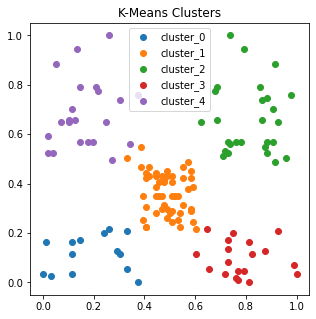

In [27]:
plt.figure(figsize=(5, 5))

for cluster_n in train_scaled.cluster.sort_values().unique():
    plt.scatter(train_scaled[train_scaled.cluster == cluster_n].spending_score, 
                train_scaled[train_scaled.cluster == cluster_n].annual_income, 
                label=f'cluster_{cluster_n}'
               )

plt.legend()
plt.title("K-Means Clusters")
plt.show()

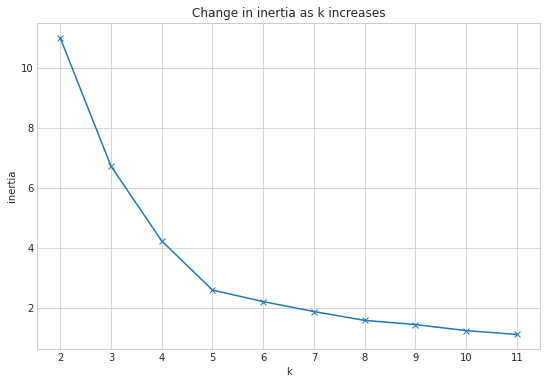

In [28]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

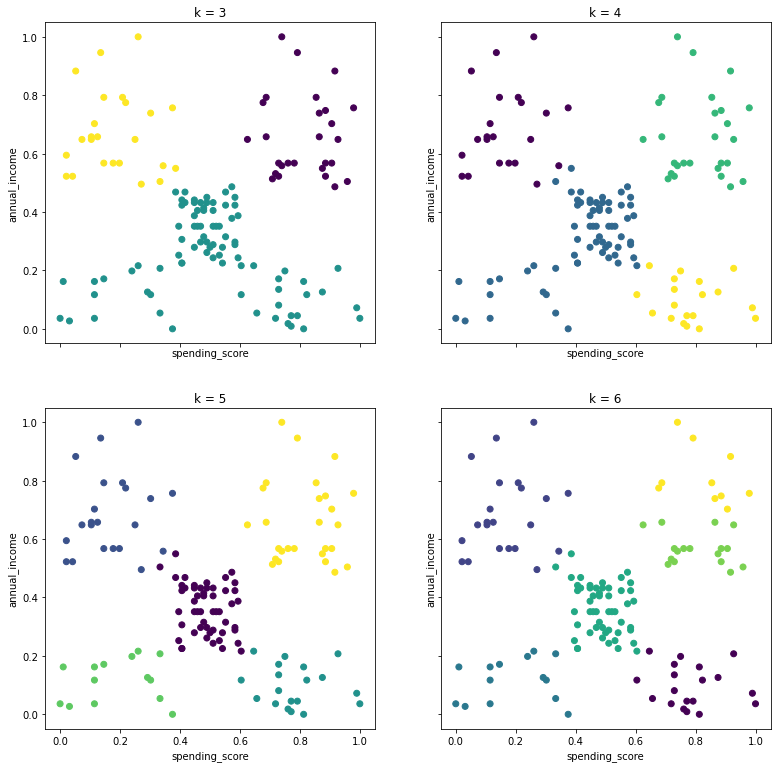

In [29]:
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(3, 7)):
    clusters = KMeans(k).fit(X).predict(X)
    ax.scatter(X.spending_score, X.annual_income, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='spending_score', ylabel='annual_income')

## Did scaling change our clusters

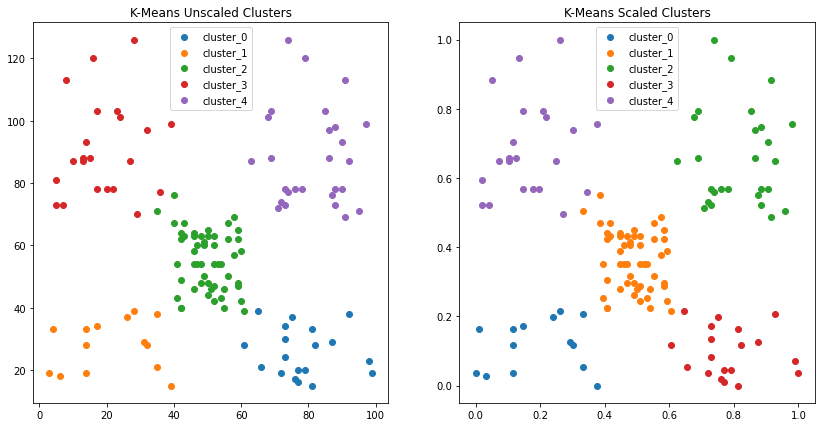

In [30]:
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

for cluster_n in train.cluster.sort_values().unique():
    axs[0].scatter(train[train.cluster == cluster_n].spending_score, 
                train[train.cluster == cluster_n].annual_income, 
                label=f'cluster_{cluster_n}'
               )
axs[0].legend()
axs[0].set(title="K-Means Unscaled Clusters")

for cluster_n in train_scaled.cluster.sort_values().unique():
    axs[1].scatter(train_scaled[train_scaled.cluster == cluster_n].spending_score, 
                train_scaled[train_scaled.cluster == cluster_n].annual_income, 
                label=f'cluster_{cluster_n}'
               )
axs[1].legend()
axs[1].set(title="K-Means Scaled Clusters")
plt.show()